In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline

import pylab 
import scipy.stats as stats

In [2]:
data = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [3]:
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [4]:
c = pd.read_csv('Eniola_train.csv')
d = pd.read_csv('Eniola_test.csv')
data  = pd.merge(data,c ,on=['ID'],how='left')
test  = pd.merge(test,d ,on=['ID'],how='left')

In [5]:
#data.to_csv('fadtrain.csv',index = False)
#test.to_csv('fadtest.csv',index = False)
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,district,region
0,5086,98,2,3,1,1,2,2,0,0,...,4,-4.460442,29.811396,0,0,0,0,0,Kasulu,Kigoma
1,1258,40,1,1,3,5,1,1,1,0,...,4,-6.176438,39.244871,1,1,1,0,3,Zanzibar,Zanzibar
2,331,18,2,4,6,3,2,1,0,0,...,1,-6.825702,37.652798,1,0,0,0,2,Morogoro Urban,Morogoro
3,6729,50,1,1,3,1,1,1,0,0,...,4,-3.372049,35.808307,1,0,1,0,3,Karatu,Arusha
4,8671,34,1,1,1,1,2,1,0,1,...,4,-7.179645,31.039095,1,1,0,1,3,Mpanda,Rukwa


In [6]:
a = pd.read_csv('lat2dat.csv')
b = pd.read_csv('lat2test.csv')

In [7]:
data.drop(['mobile_money', 'savings', 'borrowing', 'insurance'], axis = 1,inplace = True)

#distest = pd.read_csv("districttest.csv")
#distrain= pd.read_csv('districttrain.csv')
#trreg = pd.read_csv('trainregion.csv')
#testreg = pd.read_csv('testregion.csv')
#distrain.drop('region',axis =1 ,inplace = True)
#data = pd.concat([data,distrain,trreg,a], axis = 1)
#test = pd.concat([test,distest,testreg,b], axis = 1)

data = pd.concat([data,a], axis = 1)

test = pd.concat([test,b], axis = 1)



In [232]:
e = pd.read_csv('mobilemoney_dist1.csv')
f = pd.read_csv('mobilemoney_dist2.csv')

In [233]:
e.columns

Index(['Unnamed: 0', 'ID', 'min_dist_mm1k', 'cnt_dist_mm1k'], dtype='object')

In [234]:
e.drop(['Unnamed: 0', 'min_dist_mm1k'],axis = 1,inplace = True)
f.drop(['Unnamed: 0', 'min_dist_mm1k'],axis = 1,inplace = True)

In [235]:
data  = pd.merge(data,e ,on=['ID'],how='left')
test  = pd.merge(test,f ,on=['ID'],how='left')

In [236]:
data = data.fillna(1)
test = test.fillna(1)

In [237]:
ntrain = data.shape[0]
ntest = test.shape[0]

all_data = pd.concat((data, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (9459, 38)


C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [238]:
all_data.cnt_dist_mm1k.min()

1.0

In [239]:
all_data.isnull().sum()

ID                                0
Latitude                          0
Longitude                         0
Q1                                0
Q10                               0
Q11                               0
Q12                               0
Q13                               0
Q14                               0
Q15                               0
Q16                               0
Q17                               0
Q18                               0
Q19                               0
Q2                                0
Q3                                0
Q4                                0
Q5                                0
Q6                                0
Q7                                0
Q8_1                              0
Q8_10                             0
Q8_11                             0
Q8_2                              0
Q8_3                              0
Q8_4                              0
Q8_5                              0
Q8_6                        

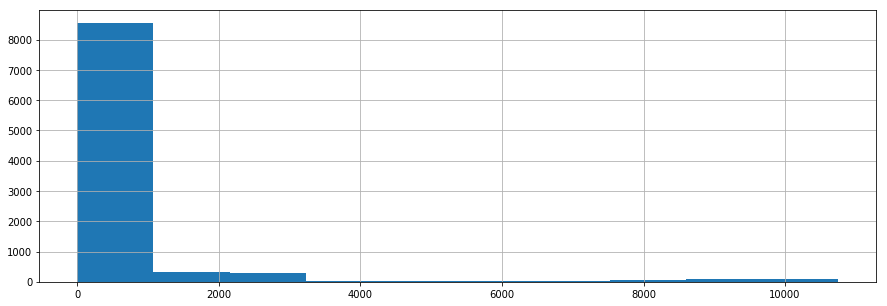

In [240]:
all_data.cnt_dist_mm1k.hist()

In [241]:
all_data.Q1.max()

100

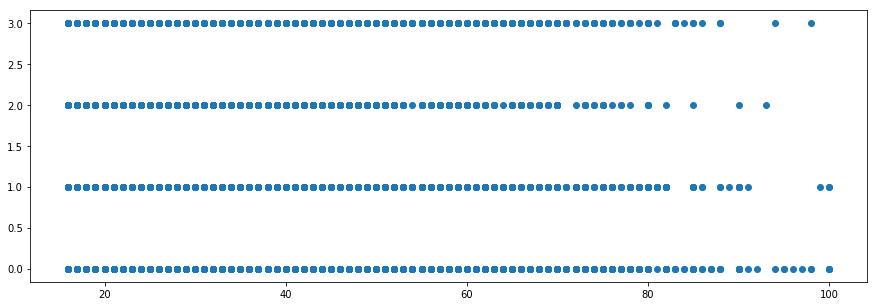

In [242]:
plt.scatter(x = all_data.Q1,y = all_data.mobile_money_classification)

C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


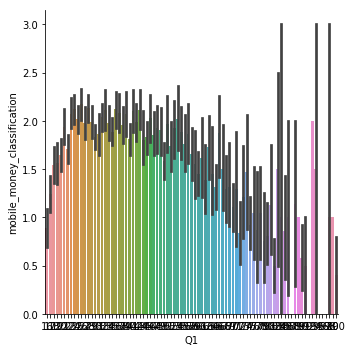

In [243]:
sns.factorplot(x='Q1',y='mobile_money_classification',data=all_data,kind='bar')

In [244]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_7,Q8_8,Q8_9,Q9,cnt_dist_mm1k,district,latitude2,longitude,mobile_money_classification,region
0,5086,-4.460442,29.811396,98,-1,-1,2,-1,2,-1,...,0,0,1,-1,12.0,Kasulu,-4.57268,30.11092,0.0,Kigoma
1,1258,-6.176438,39.244871,40,-1,-1,1,4,1,5,...,0,0,0,1,278.0,Zanzibar,-6.16875,39.20243,3.0,Zanzibar
2,331,-6.825702,37.652798,18,-1,-1,2,-1,2,-1,...,0,0,1,-1,780.0,Morogoro Urban,-6.82282,37.67290,2.0,Morogoro
3,6729,-3.372049,35.808307,50,-1,-1,1,2,2,-1,...,0,0,0,-1,54.0,Karatu,-3.33868,35.67410,3.0,Arusha
4,8671,-7.179645,31.039095,34,1,-1,2,-1,1,1,...,0,0,0,-1,2.0,Mpanda,-7.50237,31.03970,3.0,Rukwa


In [245]:
cols_to_use = data.columns

In [246]:
# let's plot the histograms to have an impression of the distribution of the numerical variables
#for col in cols_to_use:
 #   fig = all_data[col].hist(bins=50)
  #  fig.set_xlabel(col)
   # fig.set_label('fin inclusion')
    #plt.show() ''''
    
    # plot the numerical columns vs the output SalePrice to visualise the (linear) relationship

#for col in cols_to_use[:-3]:
 #   data.plot.scatter(x=col, y='mobile_money_classification', ylim=(0,4))
  #  plt.show()

In [247]:
all_data = all_data.replace(-1,0)

In [248]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_7,Q8_8,Q8_9,Q9,cnt_dist_mm1k,district,latitude2,longitude,mobile_money_classification,region
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,0,0,1,0,12.0,Kasulu,-4.57268,30.11092,0.0,Kigoma
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,0,0,0,1,278.0,Zanzibar,-6.16875,39.20243,3.0,Zanzibar
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,0,0,1,0,780.0,Morogoro Urban,-6.82282,37.67290,2.0,Morogoro
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,0,0,0,0,54.0,Karatu,-3.33868,35.67410,3.0,Arusha
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,0,0,0,0,2.0,Mpanda,-7.50237,31.03970,3.0,Rukwa


In [249]:
data.Q16.unique()

array([1, 4, 5, 3, 2], dtype=int64)

In [250]:
#all_data['hm'] = all_data['Q1']/all_data['Q16']
all_data['hm'] = all_data['Q1']/all_data['Q16']


In [251]:

#all_data['distance1'] = np.sqrt((data.latitude2 - data.Latitude) ** 2 + (data.longitude - data.Longitude) ** 2)
import math

In [252]:
#np.radians(data.Latitude)

In [253]:
from math import sin, cos, sqrt, atan2
def calculate_distance(Latitude, Longitude, latitude2, longitude):
    R = 6373.0

    Latitude = np.radians(Latitude)
    Longitude = np.radians(Longitude)
    latitude2 = np.radians(latitude2)
    longitude = np.radians(longitude)

    dlon = longitude - Longitude
    dlat = latitude2 - Latitude

    a = np.sin(dlat / 2)**2 + np.cos(Latitude) * np.cos(latitude2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

In [254]:
all_data['distance'] = calculate_distance(**all_data[['Latitude', 'Longitude', 'latitude2', 'longitude']])


In [255]:
from sklearn.cluster import KMeans

In [256]:
km = KMeans(4, init='k-means++') # initialize


In [257]:
km.fit(all_data.drop(['ID','mobile_money_classification','district','region'], axis = 1))
#c = km.predict(X) # classify into three clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [258]:
c = km.predict(all_data.drop(['ID','mobile_money_classification','district','region'], axis =1))
c = pd.DataFrame(c)
c.columns = ['clusters']
c.head()

,clusters
0,0
1,0
2,0
3,0
4,0


In [259]:
#all_data = pd.concat([all_data,c], axis = 1)

In [260]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_9,Q9,cnt_dist_mm1k,district,latitude2,longitude,mobile_money_classification,region,hm,distance
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,1,0,12.0,Kasulu,-4.57268,30.11092,0.0,Kigoma,98.0,35.481343
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,0,1,278.0,Zanzibar,-6.16875,39.20243,3.0,Zanzibar,10.0,4.770566
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,1,0,780.0,Morogoro Urban,-6.82282,37.67290,2.0,Morogoro,18.0,2.243147
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,0,0,54.0,Karatu,-3.33868,35.67410,3.0,Arusha,12.5,15.357533
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,0,0,2.0,Mpanda,-7.50237,31.03970,3.0,Rukwa,34.0,35.896694


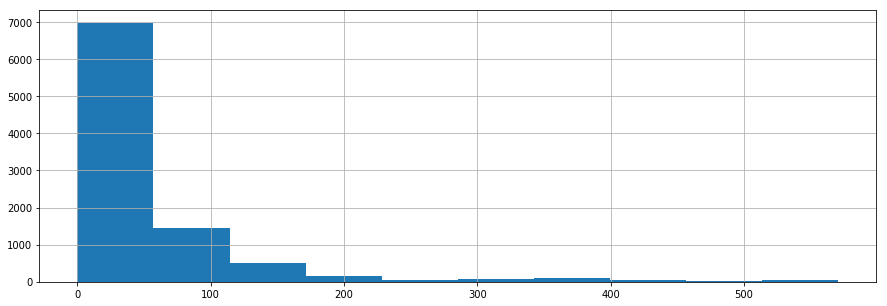

In [261]:
all_data.distance.hist()

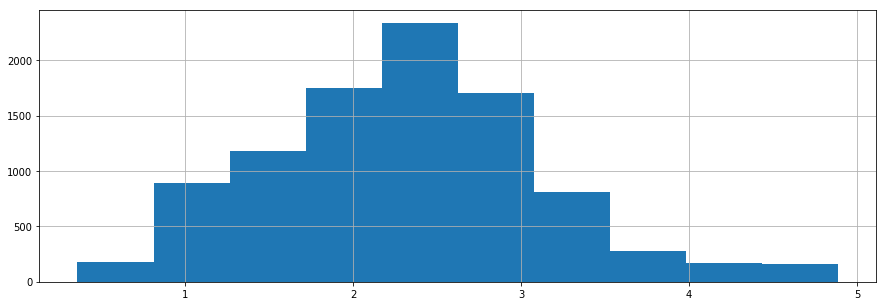

In [262]:
(all_data.distance**(1/4)).hist()

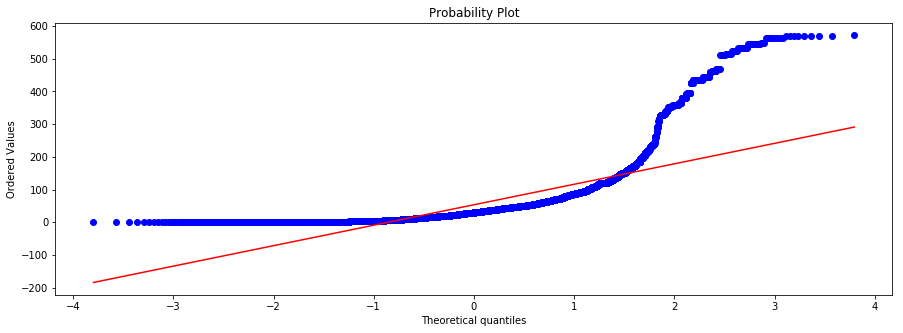

In [263]:
# and the Q-Q plot
stats.probplot(all_data.distance, dist="norm", plot=pylab)
pylab.show()

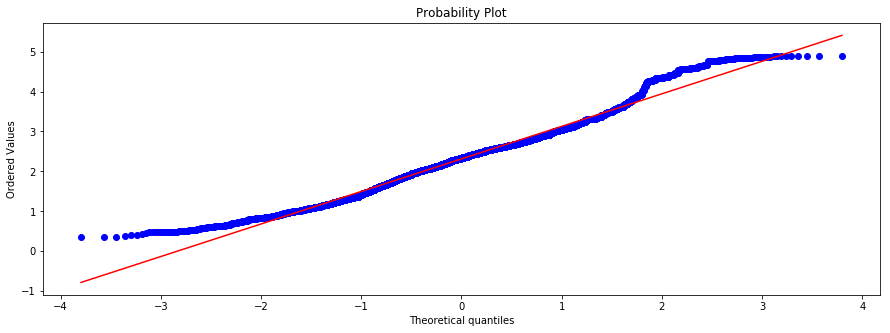

In [264]:
# and the Q-Q plot
stats.probplot((all_data.distance**(1/4)), dist="norm", plot=pylab)
pylab.show()

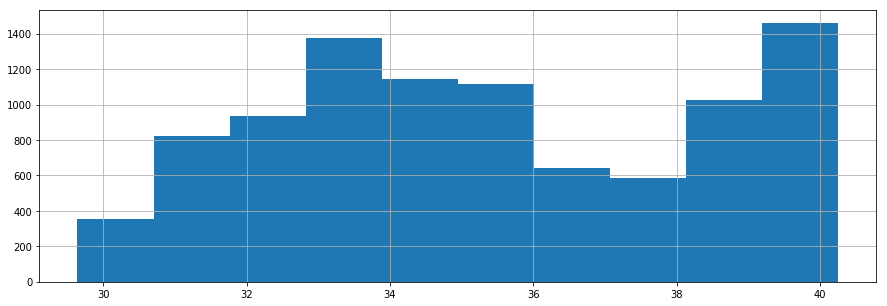

In [265]:
all_data.Longitude.hist()

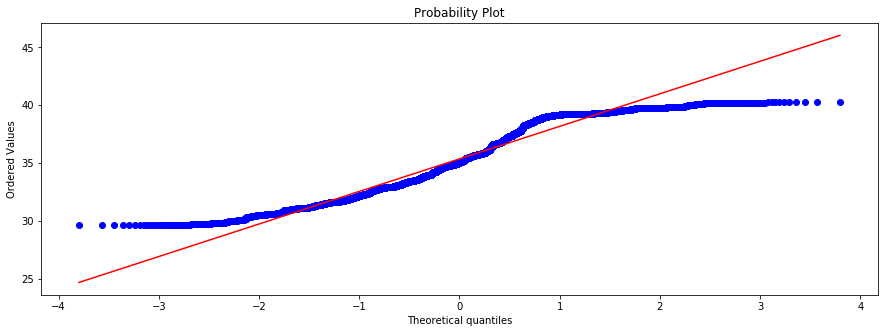

In [266]:
# and the Q-Q plot
stats.probplot(all_data.Longitude, dist="norm", plot=pylab)
pylab.show()

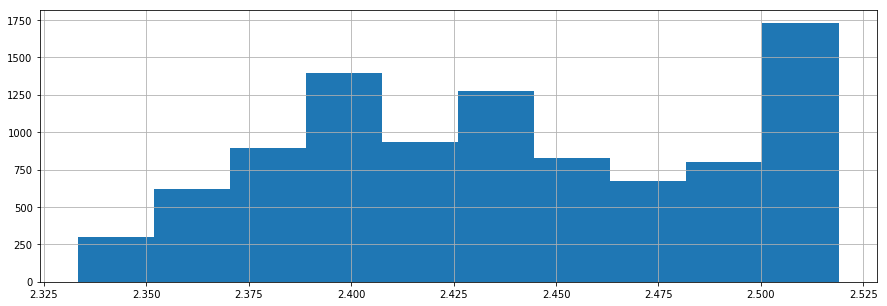

In [267]:
(all_data.Longitude**(1/4)).hist()

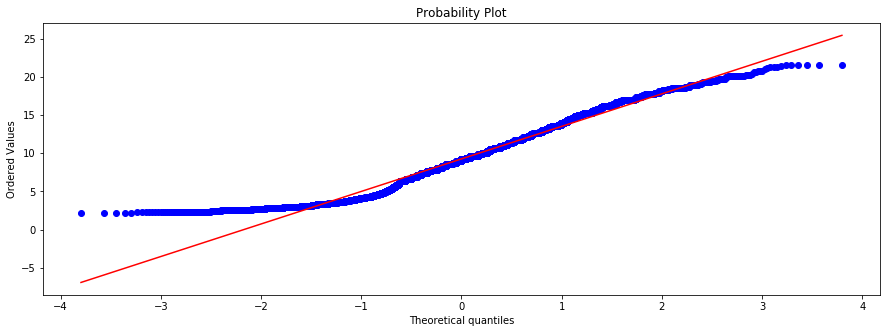

In [268]:
# and the Q-Q plot
stats.probplot((all_data.hm**(1/1.5)), dist="norm", plot=pylab)
pylab.show()

In [269]:
# let's add the transformed variables to the dataset
all_data['distance_transformed'] = all_data.distance**(1/4)
#all_data['lon_TRANSFORMED'] = all_data.Longitude**(1/1.5)


In [270]:


#created features corresponding to alternative coordinate systems
#x = xcos + ysin
#y = ycos - xsin
#all_data["rot45X"] = .707* all_data["Longitude"] + .707* all_data["Latitude"] 
#all_data["rot45Y"] = .707* all_data["Longitude"] - .707* all_data["Latitude"]

#all_data["rot30X"] = (1.732/2)* all_data["Latitude"] + (1./2)* all_data["Longitude"]
#all_data["rot30Y"] = (1.732/2)* all_data["Longitude"] - (1./2)* all_data["Latitude"]

#all_data["rot60X"] = (1./2)* all_data["Latitude"] + (1.732/2)* all_data["Longitude"] 
#all_data["rot60Y"] = (1./2)* all_data["Longitude"] - (1.732/2)* all_data["Latitude"]

#all_data["radial_r"] = np.sqrt( np.power(all_data["Longitude"],2) + np.power(all_data["Latitude"],2) )

In [271]:
#all_data['x'] = np.cos(all_data.Latitude) * np.cos(all_data.Longitude)
#all_data['y'] = np.cos(all_data.Latitude) * np.sin(all_data.Longitude) 
#all_data['z'] = np.sin(all_data.Latitude) 
#df['ATAN'] = np.arctan(df['SWD']/df['CWD'])


Text(0, 0.5, 'Frequency')

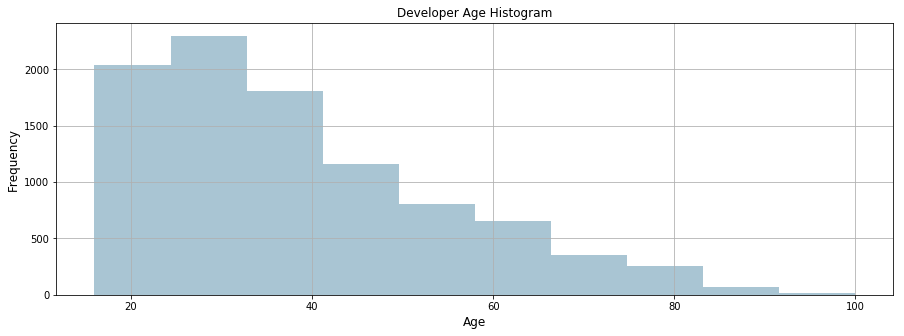

In [272]:



fig, ax = plt.subplots()  
all_data['Q1'].hist(color='#A9C5D3')  
ax.set_title('Developer Age Histogram', fontsize=12)   
ax.set_xlabel('Age', fontsize=12)  
ax.set_ylabel('Frequency', fontsize=12)


In [273]:
all_data['Age_bin_round'] = np.array(np.floor(np.array(all_data['Q1']) /10.))

In [274]:
all_data.Age_bin_round.unique()

array([ 9.,  4.,  1.,  5.,  3.,  2.,  7.,  8.,  6., 10.])

In [275]:
#all_data['latlong'] = all_data.Longitude + all_data.Latitude

In [276]:
all_data['latlong'] = all_data.Longitude + all_data.Latitude

In [277]:
#Columns = [  'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
 #      'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
  #     'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', '', 'Q17', 'Q18', 'Q19']

In [278]:
#Columns = [ 'Q13',  'Q3']
Columns = [  'Q3']

In [279]:
all_data[Columns] = all_data[Columns].astype(str)

In [280]:
#all_data[Columns] = all_data[Columns].astype(float)

In [281]:
#[feat for feat in all_data.columns if all_data[feat].std() == 0 ]

In [282]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,district,latitude2,longitude,mobile_money_classification,region,hm,distance,distance_transformed,Age_bin_round,latlong
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,Kasulu,-4.57268,30.11092,0.0,Kigoma,98.0,35.481343,2.440619,9.0,25.350954
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,Zanzibar,-6.16875,39.20243,3.0,Zanzibar,10.0,4.770566,1.477891,4.0,33.068433
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,Morogoro Urban,-6.82282,37.67290,2.0,Morogoro,18.0,2.243147,1.223811,1.0,30.827096
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,Karatu,-3.33868,35.67410,3.0,Arusha,12.5,15.357533,1.979613,5.0,32.436258
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,Mpanda,-7.50237,31.03970,3.0,Rukwa,34.0,35.896694,2.447731,3.0,23.859450


In [283]:
all_data.groupby(['Q3'])['mobile_money_classification'].mean().sort_values()

Q3
3    1.324484
2    1.793304
1    1.847625
4    1.889077
Name: mobile_money_classification, dtype: float64

In [284]:
all_data.groupby(['Q3'])['mobile_money_classification'].mean().sort_values().index

Index(['3', '2', '1', '4'], dtype='object', name='Q3')

In [285]:
all_data.Q3.unique()

array(['3', '1', '4', '2'], dtype=object)

In [286]:
ordered_labels = all_data.groupby(['Q3'])['mobile_money_classification'].mean().sort_values().index

In [287]:
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{'3': 0, '2': 1, '1': 2, '4': 3}

In [288]:
all_data['Q3_ordered'] = all_data.Q3.map(ordinal_label)


In [289]:
# ordering the cat variables

In [290]:
all_data.groupby(['Q4'])['mobile_money_classification'].mean().sort_values()

Q4
1    1.058382
2    1.386233
5    1.867238
3    1.977655
4    2.294118
6    2.444915
8    2.500000
7    2.833333
Name: mobile_money_classification, dtype: float64

In [291]:
ordered_labels = all_data.groupby(['Q4'])['mobile_money_classification'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{1: 0, 2: 1, 5: 2, 3: 3, 4: 4, 6: 5, 8: 6, 7: 7}

In [292]:
all_data['Q4_ordered'] = all_data.Q4.map(ordinal_label)


Text(0, 0.5, 'fin')

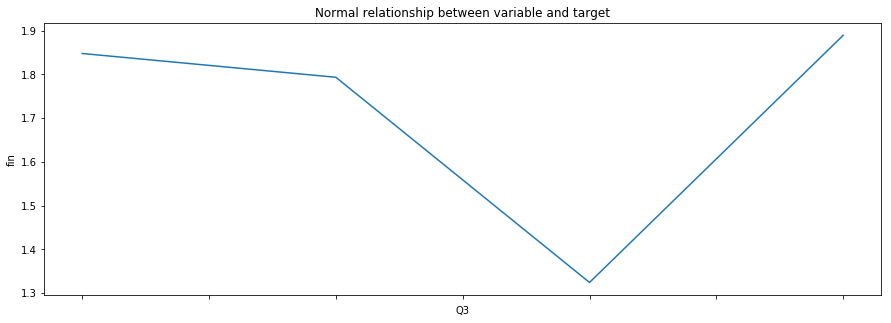

In [293]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

fig = plt.figure()
fig = all_data.groupby(['Q3'])['mobile_money_classification'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('fin')

In [294]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

#fig = plt.figure()
#fig = all_data.groupby(['Q3_ordered'])['mobile_money_classification'].mean().plot()
#fig.set_title('Normal relationship between variable and target')
#fig.set_ylabel('fin')

In [295]:
all_data.Q4.head()

0    1
1    3
2    6
3    3
4    1
Name: Q4, dtype: int64

In [296]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,longitude,mobile_money_classification,region,hm,distance,distance_transformed,Age_bin_round,latlong,Q3_ordered,Q4_ordered
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,30.11092,0.0,Kigoma,98.0,35.481343,2.440619,9.0,25.350954,0,0
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,39.20243,3.0,Zanzibar,10.0,4.770566,1.477891,4.0,33.068433,2,3
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,37.67290,2.0,Morogoro,18.0,2.243147,1.223811,1.0,30.827096,3,5
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,35.67410,3.0,Arusha,12.5,15.357533,1.979613,5.0,32.436258,2,3
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,31.03970,3.0,Rukwa,34.0,35.896694,2.447731,3.0,23.859450,2,0


In [297]:
all_data.drop(['distance','Q1','ID', 'Latitude',"Longitude",'latitude2','longitude'], axis = 1,inplace = True)
#all_data.drop(['ID', 'Latitude',"Longitude",'latitude2','longitude'], axis = 1,inplace = True)
#all_data.drop(['Q1','ID', 'Latitude','latitude2','longitude'], axis = 1,inplace = True)


In [298]:
#all_data.drop('hm',axis = 1,inplace =True)
all_data.drop(['Q4'], axis = 1,inplace = True)

In [299]:
all_data.columns

Index(['Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10', 'Q8_11', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q9', 'cnt_dist_mm1k',
       'district', 'mobile_money_classification', 'region', 'hm',
       'distance_transformed', 'Age_bin_round', 'latlong', 'Q3_ordered',
       'Q4_ordered'],
      dtype='object')

In [300]:
#all_data["std"] = all_data.std(axis=1)

In [301]:
#all_data["Mean"] = all_data.mean(axis =1)

In [302]:
#all_data.isnull().sum()
#all_data["sum"] = all_data.sum(axis  =1)

In [303]:
#from pygeocoder import Geocoder

In [304]:
all_data.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,cnt_dist_mm1k,district,mobile_money_classification,region,hm,distance_transformed,Age_bin_round,latlong,Q3_ordered,Q4_ordered
0,0,0,2,0,2,0,1,0,4,4,...,12.0,Kasulu,0.0,Kigoma,98.0,2.440619,9.0,25.350954,0,0
1,0,0,1,4,1,5,4,4,1,4,...,278.0,Zanzibar,3.0,Zanzibar,10.0,1.477891,4.0,33.068433,2,3
2,0,0,2,0,2,0,1,0,1,1,...,780.0,Morogoro Urban,2.0,Morogoro,18.0,1.223811,1.0,30.827096,3,5
3,0,0,1,2,2,0,4,0,1,4,...,54.0,Karatu,3.0,Arusha,12.5,1.979613,5.0,32.436258,2,3
4,1,0,2,0,1,1,1,0,1,4,...,2.0,Mpanda,3.0,Rukwa,34.0,2.447731,3.0,23.859450,2,0


In [305]:
#import geocoder
all_data = pd.get_dummies(all_data)



In [306]:
# remove constant features
[feat for feat in all_data.columns if all_data[feat].std() == 0]


[]

In [307]:

#Get the new dataset
data = all_data[:ntrain]
test = all_data[ntrain:]

In [308]:
data.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,region_Zanzibar
0,0,0,2,0,2,0,1,0,4,4,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,4,1,5,4,4,1,4,...,0,0,0,0,0,0,0,0,0,1
2,0,0,2,0,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,2,0,4,0,1,4,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,1,1,1,0,1,4,...,0,0,0,1,0,0,0,0,0,0


In [309]:
test.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,region_Zanzibar
7094,0,1,1,6,1,4,5,0,1,4,...,0,1,0,0,0,0,0,0,0,0
7095,1,0,2,0,1,4,1,0,1,4,...,0,0,0,0,0,0,0,0,0,0
7096,0,0,1,4,1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7097,1,0,2,0,2,0,1,0,1,4,...,0,0,0,0,0,0,0,0,0,0
7098,0,0,1,4,1,6,4,3,1,2,...,0,0,0,0,0,0,0,0,0,0


In [310]:
test.drop("mobile_money_classification",axis = 1,inplace = True)

C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [311]:
sample = pd.read_csv("sample_submission.csv")
sample.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.3,0.5,0.1,0.2
1,8208,0.3,0.5,0.1,0.2
2,2785,0.3,0.5,0.1,0.2
3,2967,0.3,0.5,0.1,0.2
4,1697,0.3,0.5,0.1,0.2


In [312]:
data.columns

Index(['Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       ...
       'region_Mtwara', 'region_Mwanza', 'region_Pwani', 'region_Rukwa',
       'region_Ruvuma', 'region_Shinyanga', 'region_Singida', 'region_Tabora',
       'region_Tanga', 'region_Zanzibar'],
      dtype='object', length=181)

In [313]:
#d = {"s": [1,1,1,1,1,1,1,1,1,]}
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [314]:
#a = pd.DataFrame(d)
#a.s.std()

In [315]:
sample.head(1)

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.3,0.5,0.1,0.2


In [316]:

data.columns

Index(['Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       ...
       'region_Mtwara', 'region_Mwanza', 'region_Pwani', 'region_Rukwa',
       'region_Ruvuma', 'region_Shinyanga', 'region_Singida', 'region_Tabora',
       'region_Tanga', 'region_Zanzibar'],
      dtype='object', length=181)

In [317]:

#data.to_csv('mytrain.csv',index = False)
#test.to_csv('mytest.csv',index = False)

In [318]:
#from skmultilearn.problem_transform import ClassifierChain


In [319]:
from sklearn.linear_model import LogisticRegression

In [320]:
from xgboost import XGBClassifier
#from tpot import TPOTClassifier

In [321]:
#data = pd.read_csv("training.csv")
#test = pd.read_csv("test.csv")
#data.drop(['mobile_money', 'savings', 'borrowing', 'insurance'], axis = 1,inplace = True)
#data.drop("ID", axis = 1,inplace =True)
#test.drop("ID", axis = 1,inplace =True)


In [322]:

X= data.drop( 'mobile_money_classification', axis = 1)
y = data["mobile_money_classification"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [323]:
y_train.head()

3849    3.0
307     1.0
1278    3.0
3142    1.0
4706    3.0
Name: mobile_money_classification, dtype: float64

In [324]:
data.shape

(7094, 181)

In [325]:
#model = BinaryRelevance(LogisticRegression())
from sklearn.tree import DecisionTreeClassifier 
#dtree_model = DecisionTreeClassifier(max_depth = 2)
#mod = XGBClassifier(n_estimators= 200, max_depth=5)
from lightgbm import LGBMClassifier
#model = XGBClassifier(n_estimators= 500,max_depth= 5, gamma=1)
#model = XGBClassifier(n_estimators= 200, max_depth=5)
#1.33680339327269
import xgboost as xgb

In [326]:
model = XGBClassifier(
          n_estimators= 265)


In [327]:
#test[Columns] = test[Columns].astype(str)
from sklearn.metrics import log_loss

In [328]:
#
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=265,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [330]:
pred = model.predict_proba(X_test)
log_loss(y_test,pred)

0.7445376590694821

In [331]:
#pred = model.predict_proba(X_test)
#log_loss(y_test,pred)

In [332]:
#0.7427861171554968
#0.7427861147425446


In [333]:
pred = model.predict_proba(X_test)
log_loss(y_test,pred)

0.7445376590694821

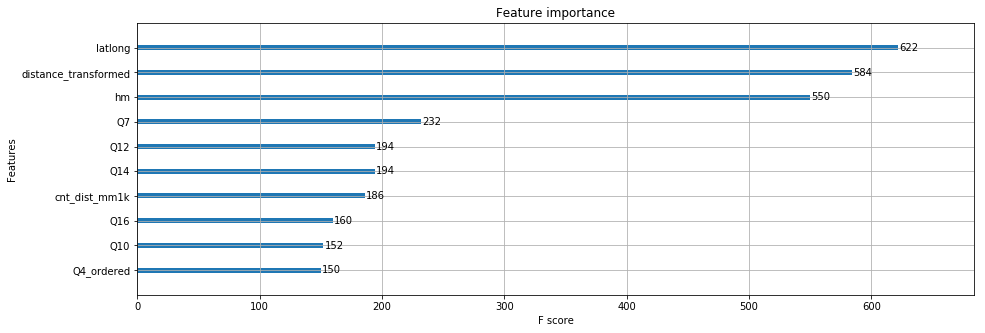

In [334]:
import matplotlib.pyplot as plt
xgb.plot_importance(model,max_num_features=10)
plt.rcParams['figure.figsize'] = [15, 5]

In [335]:
model.fit(data.drop(["mobile_money_classification"], axis =1), data["mobile_money_classification"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=265,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [336]:
#test = pd.get_dummies(test)

In [337]:
model.predict(test)

array([3., 3., 3., ..., 1., 1., 0.])

In [338]:
sample.columns

Index(['ID', 'no_financial_services', 'other_only', 'mm_only', 'mm_plus'], dtype='object')

In [339]:
model.predict_proba(test)

array([[5.9809664e-04, 2.2784767e-03, 1.7598732e-01, 8.2113606e-01],
       [2.3795381e-02, 4.5241900e-02, 1.5056287e-01, 7.8039986e-01],
       [4.7032622e-04, 6.1366824e-03, 1.0555291e-01, 8.8784009e-01],
       ...,
       [2.7557269e-01, 5.7674730e-01, 2.3893932e-02, 1.2378604e-01],
       [3.1595409e-01, 4.5519349e-01, 6.6482648e-02, 1.6236979e-01],
       [6.3484359e-01, 3.4501970e-01, 1.0632846e-02, 9.5038824e-03]],
      dtype=float32)

In [340]:
model.predict_proba(test)

array([[5.9809664e-04, 2.2784767e-03, 1.7598732e-01, 8.2113606e-01],
       [2.3795381e-02, 4.5241900e-02, 1.5056287e-01, 7.8039986e-01],
       [4.7032622e-04, 6.1366824e-03, 1.0555291e-01, 8.8784009e-01],
       ...,
       [2.7557269e-01, 5.7674730e-01, 2.3893932e-02, 1.2378604e-01],
       [3.1595409e-01, 4.5519349e-01, 6.6482648e-02, 1.6236979e-01],
       [6.3484359e-01, 3.4501970e-01, 1.0632846e-02, 9.5038824e-03]],
      dtype=float32)

In [341]:
pred = pd.DataFrame(model.predict_proba(test),columns= [ 'no_financial_services', 'other_only', 'mm_only', 'mm_plus'])

In [342]:
pred = pd.concat([sample["ID"], pred], axis =1)

In [343]:
#pred  =np.round(pred,3)
pred.head()


,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000598,0.002278,0.175987,0.821136
1,8208,0.023795,0.045242,0.150563,0.780400
2,2785,0.000470,0.006137,0.105553,0.887840
3,2967,0.372291,0.558102,0.014076,0.055531
4,1697,0.000148,0.002057,0.119192,0.878603


In [344]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000598,0.002278,0.175987,0.821136
1,8208,0.023795,0.045242,0.150563,0.780400
2,2785,0.000470,0.006137,0.105553,0.887840
3,2967,0.372291,0.558102,0.014076,0.055531
4,1697,0.000148,0.002057,0.119192,0.878603


In [345]:
pred.to_csv("with_countfs2.csv", index = False)